## Nataf - Example 2
Author: Dimitris Giovanis

In [2]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Nataf
from UQpy.SampleMethods import MCS
import numpy as np
import matplotlib.pyplot as plt

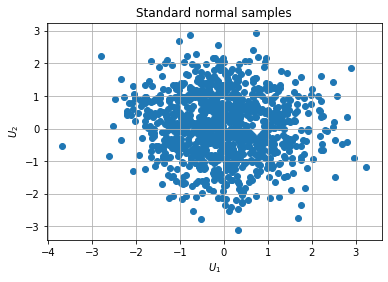

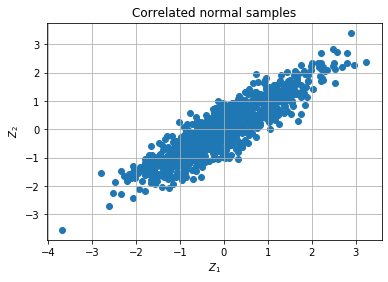

In [6]:
#In this example, the Nataf class is used in order to transform 
#1000 samples of 2 uncorrelated standard normal variables to correlated normal variables. 

# Generate uncorrelated standard normal samples using MCS class
u1 = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the initial samples
plt.figure()
plt.title('Standard normal samples')
plt.scatter(u1.samples[:, 0], u1.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()


# Correlate the samples according to the following correlation matrix
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
z = Nataf.transform_u_to_z(u1.samples, corr_norm=Rho)


plt.figure()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(z[:, 0], z[:, 1])
plt.grid(True)
plt.title('Correlated normal samples')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()

In [16]:
# Calculate correlation distortion from z to x
dist_name_x=['gamma', 'Lognormal'] 
dist_params_x=[[4, 0, 1], [2, 0, 1]]
from UQpy.Distributions import Distribution
distribution = list()
for j in range(len(dist_name_x)):
    distribution.append(Distribution(dist_name_x[j]))
               
corr_x = Nataf.distortion_z_to_x(distribution, dist_params_x, Rho)
print(corr_x)

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
[[1.         0.31649732]
 [0.31649732 1.        ]]


In [17]:
# Calculate correlation distortion from x to z
corr_z = Nataf.distortion_x_to_z(distribution, dist_params_x, corr_x)
print(corr_z)

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.3156815945396439]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.04216522873920494]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141937]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.00275588236765353]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.000712149910182668]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM